# Lab 1: Linear Regression

Welcome to the second lab session of the Machine Learning Course. In this session, let's look at a fundamental topic in Machine Learning - Linear Regression

Before we start, let us see what 'Regression' means.


### Regression
Regression is a statistical concept, which refers to finding relationships between different quantities. This lies at the core of Data Sciences. Finding how different types of data are related are used to find meaningful conclusions and decisions. 

In the context of Machine Learning, Regression refers to the prediction of a *continuous* mathematical real-numbered variable as the output, when the model is given some inputs, in the form of variables. This output value is predicted by observing patterns in the data you provide to it. 

For example: look at this image below and observe any pattern that you can interpret visually. 

![image](https://drive.google.com/uc?id=1v3vc-cqwrMekvjtT4XLY2XSNzbH51Rwf)

This [chart](https://www.worldometers.info/coronavirus/country/us/) shows the daily Covid-19 Cases in the United States. Do you see some trends? You would observe that the number of daily cases rise and fall and rise again, almost like a wave. 

Hospitals need to prepare resources, such as hospital beds, ventilators, oxygen supply, and even testing kits well in advance. Thus, an estimate of the expected number is surely helpful. 

Observe the part towards the end of the curve on the right. The chart tells us, that everyday since 29 December 2019, the number of cases have crossed 200,000. Moreover, since December 1, till Jan 15, the number of cases have crossed 200,000 on all days except some 7 odd days. But to compensate this, the number of new cases cases have even risen beyond 300,000 on one day, and more than 250,000 on many days. 

If you were to predict the  number of cases on the following day, it would be very reasonable to the number of Covid-19 positive patients to be above 200,000, because thats the trend. Ofcourse, you never know, the number may be lower or even extremely high - It may even cross 400,000. But *chances* are the number will be in this ballpark. This is what regression means - to observe the patterns in the data and *predict* a value with high confidence. Here, given the input, such as the number of new cases in the past month, the number of tests carried out, and the history of the events of the past few days (for example, public events that may have acted as super-spreader events), we predict how many cases there will be in the future. Infact, this is what statisticians do - they predict how worse the pandemic can get, and when the curve is expected to flatten, using these techniques.

One important concept to understand is - that we can only **predict** our results, with a probability (or, in other words, with high confidence), and so, there is always a chance that our prediction is wrong, or off by a large margin. Our job is to give the best possible results, based on the data that we have been provided with. And a larger probability (ie, higher confidence) is desirable, because we can be more sure that our results will be accurate (or close to the actual value).  

Let us begin with our discussion on Linear Regression!

#### Linear Regression

Given some data `x`, the results of which we know, and represent as `y` (which may be refered to as the target value, or the ground truth value) (keep in mind, the target values are not predictions - they are actual values which were factually observed in the real world), our simplest approach can be to map a function `y=f(x)` that maps the relation between the inputs (`x`) and the output (`y`). 

The simplest function that can be made to "learn" these relations and patterns is a linear function. Given an input `x`, the output will be given as:

```
 f(x) = w.x + b  #this is our model. '.' represents multiplication
 pred = f(x)  #pred is the prediction of the output, given some input x
```
The coefficient of `x`, ie, **`w`**, and the intercept term **`b`** are the *parameters* of our linear function. If the linear function is designed properly, meaning, if `w` and `b` are given proper values, then `pred` can be closer to the actual output y. Note that our parameters are real valued numbers.

This is essentially learning the patterns of the data. So now, when you want to predict the output, of which you **do not** know the ground truth output (for example, future prediction), the model will predict the output based on the data we had provided to it. This is because, we assume, that all data shows a common pattern. Since, we have learned that pattern by adjusting our parameters, our predictions are expected to give good results. 

Above is shown the linear regression technique for ONE independent variable (x) which is to be mapped to ONE dependent variable (y). You may have multiple dependent variables (x1, x2, x3 and so on), which is to be mapped to the dependent variable (y) , and in that case, the model looks like:
```
f(x1,x2,x3 ...) = w1.x1 + w2.x2 + w3.x3 + .... + b
pred = f(x1,x2,x3 ...)
```
![image](https://drive.google.com/uc?id=10-K2YfkYT8O24I5eS9xWIHL6H6Xf3pbj)

In this picture, we fit a linear regression model to the data. Now for an unseen data, the model would predict a value that lies on this line. This is a fairly accurate representation of the data, since we observe that all the data more or less lies alone a straight line.

As an example, let us take a look at the price of the Google stock in the New York Stock Exchange, over the course of many years.


##### **Case Study: The New York Stock Exchange**

###### **Setting up our Data**

Let us begin by downloading the [NYSE Dataset](https://www.kaggle.com/dgawlik/nyse), which contains details of the  . If you click on the hyperlink, you will be redirected to a website called *kaggle.com*. This website is one of the most famous websites for Data Science Practitioners. It provides access to many datasets, both small-scale and large-scale, and a platform for practitioners to discuss their solutions, share ideas, and even compete. Many competetions are even paid, meaning the winner of the competition wins a price money of thousands of US dollars, sometimes even in millions! Infact, many game-changing Machine Learning research papers have resulted from kaggle competitions. And many top *kagglers* (as they are called), called as *kaggle grandmasters*  are known to have been offered high-paid positions as Data Scientists at top tech-companies and research institutes. 

To download datasets from Kaggle, we need an account. **So head over to the website and make an account**! You can simply signup using your google account, without having to go through the entire procedure!

Kaggle provides us with an API (a function that saves us from a lot of technicalities) to pull datasets from the website. For that, we need to download a file which contains the mechanism to download datasets over the cloud. This file is goes by the name `kaggle.json`, and is unique to each kaggle account (This is done so that Kaggle knows who is downloading the dataset, because when a lot of data belongs to companies, which have their own legal requirements. So this is a method to hold accountability against any user who misuses the data. We don't need to worry about it!) 

So...

* Head over to www.kaggle.com 
* On the top right corner, click on your profile photo. Then go to *My Profile*
* Click on *Account* on the top menu bar.
* Click on *Create new API Token*. A file named `kaggle.json` will be downloaded!    

Ideally, the API expects the file to be located in your computer at the location `~/.kaggle/kaggle.json`. 

(So if you're using your PC rather than this notebook, you can simply create a folder named `.kaggle` in your root directory, and put the `kaggle.json` file in that directory)

For those who are using this notebook, this poses a problem! We are not running this notebook using our own PC's CPU/GPU, but rather running this notebook on a PC on a remote Google server, and we don't have the interface to the PC on which this notebook is running. We only have access to this notebook. But, below we have provided you with a peice of code, that lets you upload the `kaggle.json` file from your computer, and send it to the remote PC on which we're working. The source of the code can be found [here](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=0HtGf0HEXEa5). 

Upload the `kaggle.json` file using the `Choose Files` button after running the cell below. Make sure the name of the file is nothing else other than `kaggle.json`.

In [ ]:
#Code to upload kaggle.json from local PC to the remote server
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


Then, to download the dataset, we go to the [dataset page](https://www.kaggle.com/dgawlik/nyse), click on the three vertical dots on the right, and click on *Copy API command*.

Now paste this command in the cell below. But to run this code, we need to add a `!` at the beginning of the command. This is because this code is not a python code, but a terminal code. The `!` tells that Jupyter Notebook that the code written following this, is a terminal code, and not in python. We've already written this for you...

In [ ]:
!kaggle datasets download -d dgawlik/nyse

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Next, unzip the dataset file (which is downloaded in the form of a zip file). We also move the contents of the file to a new folder, which we name "nyse_dataset". 

Once we unzip the dataset, we take a look at the dataset folder using the `ls` terminal command

In [ ]:
!mkdir nyse_dataset
#mkdir is the terminal command to make a new folder with a specific name (which here, is "nyse_dataset")
!unzip nyse.zip -d nyse_dataset #unzip the nyse.zip file and move the contents to the folder named "nyse_dataset"

Archive:  nyse.zip
  inflating: nyse_dataset/fundamentals.csv  
  inflating: nyse_dataset/prices-split-adjusted.csv  
  inflating: nyse_dataset/prices.csv  
  inflating: nyse_dataset/securities.csv  


In [ ]:
%cd /content/nyse_dataset 
!ls
#These are the files inside the downloaded dataset

/content/nyse_dataset
fundamentals.csv  prices.csv  prices-split-adjusted.csv  securities.csv


That's it regarding the setup of our dataset! The process may seem slightly overwhelming at first, but its really not. Its just 3 steps - 
1. Make sure your API key (the json file) is present. If you're using your local PC to run this code, you dont even have to do this again and again.
2. Download the dataset using the command that Kaggle provides you with
3. Uzip it and visualize it!

It becomes almost effortless over time. So do not worry if you cannot wrap your head around everything at once. The important idea is to understand the workflow.

Now lets actually start processing our data!

###### **Working with our data**

We will be carrying out our analysis on the `prices-split-adjusted.csv` file. Notice that our file is a `.csv` file, which stands for "comma separated values". Its similar to an Excel file containing data. If you open a csv file using any text editor, you would find data in a row separated with commas, and each line acting as a whole row.

`pandas` is one of the most widely used libraries in python to handle csv files. We will create a "dataframe" using this library, which is nothing but the data represented in the form of a table. This can be used to extract certain values in the data. 



In [ ]:
import pandas as pd # we call the pandas library and give it an alias (pd), which we will use as a shortcut to call pandas
dataframe = pd.read_csv( 'prices-split-adjusted.csv', parse_dates=['date']) #store the dataset in the prices-split-adjusted.csv in the variable called dataframe
dataframe.head() #.head() is a method to print the first 5 rows of the dataframe

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


Let us understand this dataset. The first column of the dataframe is the date on which the stock prices are recorded. According to the dataset description on the kaggle page, the stocks are recorded from 2010 to 2016. 
The second column is the Stock Exchange symbol of the company. To find all the companies in the dataset, we use the `unique()` method, which finds all unique values in a column.

In [ ]:
dataframe['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

We'll work with the dataset of only one company - Google (Now called the Alphabet Inc Company) (the symbol of which is 'GOOG'.)

In [ ]:
google_df = dataframe[dataframe['symbol']=='GOOG'].set_index('date')
google_df.head() #notice, the dates act as the indices of the dataframe, ie the key that we can use to refer to a particular row

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0
2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0
2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0
2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0
2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0


In [ ]:
len(google_df) #let us check how many rows of data do we have

1762

In [ ]:
#additional information: 
#to extract one row of data, say of the date 2010-01-04, we use the loc method:
google_df.loc['2010-01-04']

symbol         GOOG
open        312.305
close       312.205
low         310.955
high         313.58
volume    3.927e+06
Name: 2010-01-04 00:00:00, dtype: object

The remaining of the columns are details of the stock price and company, such as the opening price on any day, the closing price, the highest and lowest stock price on any day, and the volumes of trades done on a day. We are concerned with the closing price of the google stock on each of these days. We are given the stock prices between 2010 and 2016. **Let us try to find what the stock price may be in the future. We will find the stock price at the end of each year from 2017 through 2020, and also try to predict what the stock price may be at the end of 2025, if the stock were to increase in value at the same rate.**

Let us start by visualizing the data. We use the matplotlib library to plot our data. It is The most widely used python library to plot and visulaize data. Again, we'll be using an alias (plt) to avoid writing the entire phrase again and again.

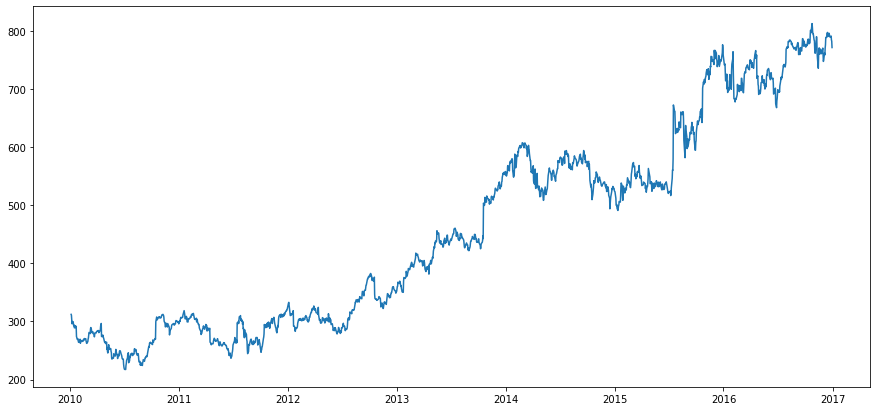

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(google_df.close) #the x axis is the date, the y axis is the closing price of the stock on any given day

Can you guess which variable is the dependent variable and which is independent?

The time is the independent variable, and the stock price is the dependent variable. Let us put them in the variables `x` (for independent variable), and `y` (for dependent variable). But how do we use the date as an input? Remember, all values need to real numbers.

One approach is to use the number of days since the first day that is recorded in the dataset. Let us use this as the independent variable. We will make two different lists for `x` and `y` respectively. 

In [ ]:
first_day = google_df.index.min() #remember, dates are indices to the dataframe
first_day #this is the day relative to which we'll calculate the number of days passed.

Timestamp('2010-01-04 00:00:00')

This refers to a specific time - 4 January 2010, at 00:00:00 hrs

Let us define a function that takes in a date from the dataframe, and calculates the number of days since this date

In [ ]:
def calculate_days_since(date,reference=first_day): return (date-reference).days 

#'date minus reference' would return the difference in terms of the exact time elapsed, till the exact milliseconds.
#the .days method ignores everything except the number of days, which is what we require!

You might be wondering? how can we subtract two dates (date and reference)? 
Actually, go back above, and notice the statement where we read the csv file. 
there's an argument that says parse_dates: which tells pandas to not consider the column 'dates' as a string, but as meaningful objects.
By writing this argument, pandas now knows that these strings are dates, and provides us with methods to handle them. One such is that, we 
can subtract two dates to get the difference. 

Internally, all dates are converted into objects of another python library, called the datetime.
So if we are to pass a date to this function, we need to first convert it to a datetime object. So let us import that library.

In [ ]:
from datetime import datetime

Let us look at if the function we defined above works. Lets see, how many days have passed between the reference date (4 Jan 2010) and 1 Jan 2021. 

In [ ]:
calculate_days_since(datetime(2021,1,1)) #The syntax of datetime is datetime(year, month, day)

4015

Yes, that works perfectly. If it doesn't, look if the syntax is correct (including, if brackets are opened and closed properly, and if the inputs are correct.

Let us, finally, build our dataset (meaning, our `x` and `y`)

In [ ]:
x=list(map(calculate_days_since,google_df.index))
x[:10] #seeing the first 10 items of our x

[0, 1, 2, 3, 4, 7, 8, 9, 10, 11]

In [ ]:
y=list(google_df.close)
y[:10]

[312.20530835799997,
 310.830458632,
 302.994812557,
 295.941242071,
 299.88646988799997,
 299.433161001,
 294.138016503,
 292.449323638,
 293.824173364,
 288.917548598]

In [ ]:
assert len(x)==len(y)

There's some python jargon here. Let us look at these. Everytime we come across a new, important concept in Python, we'll write a small note with the heading **"LESSONS IN PYTHON"** 


---
---
### **LESSONS IN PYTHON**

1. 
```
x=list(map(calculate_days_since,google_df.index))
```
map is a function that can be used to apply a function over every value in a collection of values. Here, we wish to apply the `calculate_days_since` function over every value in the collection of dates, which is given by `google_df.index` (remember, the dates are the indices of the dataframe, and the .index method returns a collection of all indices). 

 So, this function takes values from `google_df.index`, and pass it through the `calculate_days_since` function, and returns a collection of the values as `map` object. Obviously, this `map` object is of no use to us, we want the result to be in the form of a list. So we pass the result of the map function to the function `list()`, which returns a list of the values.

2. ```
assert len(x)==len(y)
```

 assert is a sleek method in python to check a condition. If the condition is satisfied, it does * nothing *. If the condition is not satisfied, an error is raised. This immediately aborts all functionality, and can be used as an effective debugging tool, to find out where exactly in the code an error exists. And if no error exists, this method does not interfere with the functionality of the code.
Here, we are making sure that the number of items in our dependent variable y is the same as the number of items in our independent variable x. So if no output is given, or no action takes place, it means that indeed, the condition is satisfied, and we're good to go!

---
---

Let us visualize the data using the `plt.plot(x_axis,y_axis)`. 

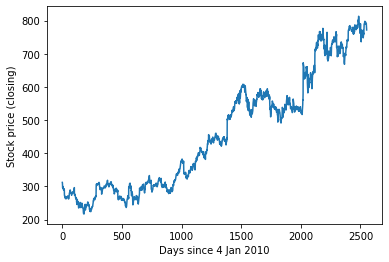

In [ ]:
plt.plot(x,y)
plt.ylabel('Stock price (closing)');
plt.xlabel('Days since 4 Jan 2010');

## The Linear Regression Model
We will look at two methods to build a Linear Regression Method:
1. By using a direct formula.
2. The Gradient Descent.

The idea of Linear Regression is to make sure that our predictions are as close to the target value as possible. To ensure this, we use the method of Least squares. In other words, our objective is: Minimize the difference between the predictions and the ground truth. Since we do not care about the sign of the difference, we square the difference, in order to ensure we always get a positive value. 

Hence our goal can be written as:

Minimize $\frac{1}{n} \sum_1^n(pred - y)^2$. 

We call this the loss function. Smaller the value of the loss function, the better the model is considered. It is nothing but the *average sum of squared errors*. 

### Method 1: Direct Formula:
Given some input x and output y, you can directly calculating the line of best fit using the formula described below. :
(Disclaimer: You Don't need to  memorize these formulae!)

$ y= w_{1}x_1 + w_2x_2 + .... + w_k x_k + b$

$w_i =  \frac{\sum_1^n(x_i - \bar{x_i})(y - \bar{y})}{\sum_1^n(x_i - \bar{x_i})}$

$b= \frac{1}{n} \left \{\sum_{1}^{n} y - \sum_{i=1}^{k} w_i (\sum_{1}^{n}x_i)  \right \}$

Where n is the number of training points, k is the number of independent variables, and all other notations have standard mathematical meanings. These calculations come from solving a differential equation in order to minimize the square of the difference.  

This seems quite confusing. Fortunately, there are many python libraries out there that do this calculation for us. One such library is the `scikitlearn` library. Let us import that library.

In [ ]:
from sklearn.linear_model import LinearRegression

[Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) is the documentation of the function. The `fit()` method is used to find the parameters of the model (w and b). However, according to the documentation, the model expects each data point to be a separate list, and all these lists to be contained in one massive list.  
`[[i] for i in x]` does that for us. This method of making a list is called list comprehensions. Basically, for every value in x, which we denote as `i`, put a list containing i (`[i]`) inside the list. 

In [ ]:
modified_x = [[i] for i in x]
print(modified_x[:10])

[[0], [1], [2], [3], [4], [7], [8], [9], [10], [11]]


In [ ]:
reg=LinearRegression().fit(modified_x,y) 

The weights `w` are stored in the `coef_` method of the `reg` object, and the intercept term `b` is stored in the `intercept_` method. 

In [ ]:
w,b = reg.coef_ , reg.intercept_
w,b

(array([0.22513196]), 172.36461228620266)

### Let us see how good this performs:

In [ ]:
#we define a function that predicts the values according to this model
def lin_model(x): return x*w + b

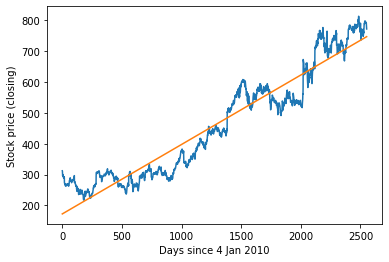

In [ ]:
plt.plot(x,y)
plt.plot(x,[lin_model(o) for o in x])
plt.ylabel('Stock price (closing)');
plt.xlabel('Days since 4 Jan 2010');

Looks pretty accurate! Visually too, you can see that the line fits pretty well within the data. 

In [ ]:
day=datetime(2017,12,31)
days_elapsed= calculate_days_since(day)
days_elapsed

2918

In [ ]:
lin_model(days_elapsed)

array([829.29967968])

### Method 2: Gradient Descent
Gradient Descent is an algorithm which iteratively updates the values of the parameters until a goal is met, using derivatives. In our case, the goal is to minimize the loss function as we mentioned above. 

The way Gradient Descent works is by minimization of the loss function through the concept of gradients. Below is a dummy example:

Consider a function that needs to be reduced. Let this be a quadratic function for the sake of simplicity. Our job is to find the value of x (on the x axis), that makes y (the independent variable), minimum!

![image](https://drive.google.com/uc?id=1aT-hkr91lj6Gj8exxIzOZ0X7_QHOyhVP)

Suppose you start from a random point on this graph, say (x,y) = (4,16). How do we, from here, proceed towards the *minima* of this graph?

![image](https://drive.google.com/uc?id=1Rd3i0k69mG8x4ChHIyX0Qi5_9KwZBF6T)

Gradients provide the answer! Gradients, if you don't know, is the slope of the curve. You must have studied about the method to calculate the gradient - *rise over run*. If you do not know what gradients are, head over to Khan Academy. [Here](https://www.youtube.com/watch?v=tIpKfDc295M) and [here](https://www.youtube.com/watch?v=_-02ze7tf08) are some videos to get you started!

If you now have some idea about gradients, let us proceed with our discussion on gradients. Gradients are real valued numbers, which represent how the values of the graph are changing. 

Let us start by assigning a totally random value to our parameter x. Now, at the point (4,16) (the red point), can you guess whether the gradient of y with respect to x, is positive or negative? 

It is positive! Infact, if you know how to calculate the gradient of a quadratic function $f(x)=x^2$, it is simply $f'(x) = 2x$. So at x=4, the gradient is simply +8.

**Gradient Descent continuously updates the parameter (x) by a value opposite to the sign of the gradient of the dependent variable(y) with respect to the parameter(x).**

If the gradient of y with respect to x is positive, update x with a negative number. (Meaning, **Reduce** the value of x by a certain number.)

If the gradient with respect to the parameter(x) is negative, increase the parameter(x). If you continuously update the parameters using this method, you will reach to the minima of the function. 

![image](https://drive.google.com/uc?id=1LjqBwdupEE7RoT1ogvYKVvoaVT6FVKzr)

*Our parameter is continuously updated in steps that move towards the mimima. x goes from 4 to 3 to 2.2 to 1.5 and so on, until it reaches 0*

How do we represent this practically?
```
#Step 1: calculate gradients
gradient(x) = 2*x      #(gradient of the quadratic function x**2 is 2*x)

#Step 2: update the parameters
x -= step_size*gradient(x)      #x-=number is the same as x=x-number.
```
Let us understand the weight update step.
You would understand why we are subtracting from x. This is because we are taking a step of the opposite sign of the gradient. If the gradient is positive, x increases by `step_size*gradient(x)`, and if negative, x decreases by the magnitide `step_size*gradient(x)`. 

What is step_size?
Step_size is a small positive number, which lets us control **how big a parameter update takes place**. When we study Neural Networks, you will see why we need to control the size of the step. But you can get a basic intuition about the idea - if the step_size is too small, it'll take forever to reach the minima. If the step_size is too large, you may overshoot the minima. Meaning, for example, if you're currently at x=0.1, you need to update the parameter by 0.1 to reach x=0. But because of the high learning rate, you can only take a step bigger than this, and thus never reach the minima. The step_size is also known as the **learning rate** in Machine Learning. So keep this term in mind when we further study Gradient Descent, predominantly during Neural Networks! 

What happens when we finally reach x=0. We know that x=0 is the minima of this curve. But also notice, that the *gradient with respect to x is also 0*. So the weight update step does not update the parameter, and the value remains stagnant. At this point, we have fulfilled our goal! Notice how we started from a random value and still reached the minima using this algorithm!
 
 ---

So how would Gradient Descent look like for our problem? What would be our model function (y)? and what would be the independent function (x)?

y is the function which needs to be minimized, so this would be our Loss Function (the average sum of squared error between the target and model predictions). x would be our parameters which need to updated such that y (the dependent variable) is minimum. So we'll be running the gradient descent separately for each of the parameters (w1,w2,w3....,wk,b)


### **Implementing Gradient Descent**
To implement this library, we'll be using PyTorch, a framework built on top of Python, which is known for efficiently handling Deep Learning (ie, the Machine Learning concerned with Neural Networks). The reason we are using PyTorch, is because PyTorch can calculate the gradients for us, without us having to tell the mathematical formula for the gradient. You can calculate the gradients for **ANY** function, however complex, and we don't even have to know how to calculate the gradient. It may seem bizarre at first - you may ask, how would pytorch know what our model, or loss function is! And so, how would it know how to calculate the gradients? Does it know the gradients of all functions in this universe?
We will see how this works. This mechanism is called *autograd*.

In [ ]:
#let us start by importing the PyTorch library, which is denoted by torch
import torch

We have 2 parameters, `w` and `b`, that we need to find values of, such that predictions are such that the loss function is minimum. (This sentence summarizes the entire concept of Linear Regression, so make sure you go through it again and understand it well). As we mentioned before, we will first start with random values for `w` and `b`. 

In [ ]:
params=torch.randn(2).requires_grad_() #initialize w and b with a random value of size 1. This is the dimension sizes.
w,b=params
w,b

(tensor(0.2998, grad_fn=<UnbindBackward>),
 tensor(-0.4087, grad_fn=<UnbindBackward>))

Notice that these parameters are in the form of **tensors**. What are tensors? Tensors are PyTorch specific data structures that can efficiently handle data. They are basically n-dimensonal matrix-like structure. For example, a one dimensional data structure is simply a list. A 2 dimensional structure is a 2-D matrix. A 3D structure is a 3-D Matrix (having height, width and depth), and so on. So you can have very complex data types within tensors. Tensors make operations very efficient!

We also added a `.requires_grad_()` in front of the random initialization of these parameters. This function is available only for tensors, so you cant randomly  append this function to any other datatype. *This is the pytorch function which tells PyTorch that these parameters need to be updated.*

So, naturally, it needs gradients, in order to be updated (refer back to the parameter update formula). And once we tell PyTorch that these variables need gradients, it will *keep track of all operations you do on those variables. So it knows how to calculate the gradient for this. For example, if your model is a quadratic function, PyTorch will keep track of this, and hence know internally, how to calculate the gradient of the quadratic function. We'll be discussing this in more depth later*.

Let us now define our model:

In [ ]:
def model(x,params=params): 
    w, b= params
    return w*x +b 

Here comes another aspect of PyTorch. It expects all operations to be done between tensors only. So let us convert our data to tensors!

In [ ]:
x_tensor,y_tensor = torch.tensor(x).float() , torch.tensor(y).float() #PyTorch expects everything to be floats. You dont have to know this fact at this point
x_tensor.shape, y_tensor.shape

(torch.Size([1762]), torch.Size([1762]))

In [ ]:
#Let us see if the model works on our data tensors...
preds=model(x_tensor)
preds.shape

torch.Size([1762])

Let us run this model on our inputs:

And let us finally calculate the loss function. Let us define this function. We use a predefined Mean Square Error Loss function, which is defined in PyTorch. If you ever want to find out how to import a functionality from a library - a quick Google search always helps. For example, you can type "PyTorch MSE loss", and you would surely get some results. Even if a functionality doesn't exist in the library, you may find discussions on some forum related to your query.

By searching, we find that MSE is defined at a [specific submodule](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) of the torch library - called the "nn". 

In [ ]:
loss_fn=torch.nn.MSELoss() #Pytorch already implements the Mean Square Error Loss function for us. 
#It is equivalent to mean((pred-target)**2)

def loss_LinearRegression(pred,target):
    assert len(pred)==len(target) #we need to make sure that there are as many predictions as targets. If not, then there is some error in our code
    return loss_fn(pred,target)

In [ ]:
#let us test this function on our predictions and target values
loss=loss_LinearRegression(preds,y_tensor)
loss

tensor(11652.6660, grad_fn=<MseLossBackward>)

Now, the next step is to calculate the gradient of our parameters with respect to the loss function. Remember, moving in the direction opoosite to the sign of the gradient would minimize the function of which the gradients are calculated (in this case, the loss function). **Calculating Gradients is as simple as typing the `.backward()` function**

In [ ]:
loss.backward()
#gradients have now been calculated. Let us check these gradients

In [ ]:
params.grad #the .grad method of tensors tell us the gradients of the loss function with respect to these parameters. 
#if you calculate the gradients by hand, you would get this value only!

tensor([-116270.5391,    -154.9499])

Finally, let us update our parameters.

In [ ]:
lr=1e-4
params.data-=lr*params.grad
params #go back up and verify that the value of params have indeed changed!

tensor([11.9269, -0.3932], requires_grad=True)

Let us also define a function that does one complete cycle.

In [ ]:
params = torch.zeros(2).requires_grad_() #re-initializing our parameters

def train_one_iteration(params,lr=1e-4): #In python 1e-4 is the same as saying 10^-4. Similarly, 2e5 would mean 2x(10^+5). And so on...
  preds = model(x_tensor, params)
  loss = loss_LinearRegression(preds, y_tensor)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None #The details of this peice of code will be discussed in the Neural Networks section. But note: it is an essential step

Now let us finally run the Gradient Descent Algorithm. Remember, this is an iterative algorithm, and needs to be run multiple times. In each run, or iteration, the loss will reduce, and the predictions will hence improve! Let us first see how the model predicts initially, before training.

MSE Loss: 323.17138671875


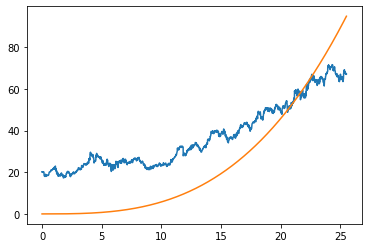

In [ ]:
#since we plan to visulaize the model in terms of a plot again and again, it is useful to write a function. 
#Remember, functions are an efficient way to avoid writing the same peices of code again and again
def plot_linreg_model(params):
    plt.plot(x_tensor,y_tensor)
    pred=model(x_tensor,params).detach()
    plt.plot(x_tensor,pred)
    print('MSE Loss:',loss_LinearRegression(pred,y_tensor).item())

plot_linreg_model(params)

In [ ]:
for _ in range(50): train_one_iteration(params,lr=2e-7) #run this algorithm 50 times

MSE Loss: 10061.9794921875


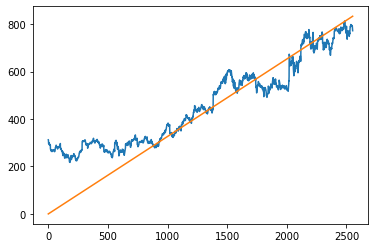

In [ ]:
plot_linreg_model(params)

The model has definitely improved! You can even see, the loss has improved. But if you go back to the section where we calculated the best fit line through the direct formula, you'd see that this fit is still off. So let us run it for some more iterations.

MSE Loss: 10060.4833984375


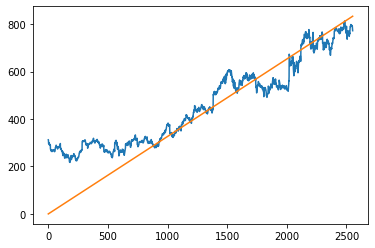

In [ ]:
for _ in range(1000): train_one_iteration(params,lr=2e-7)
plot_linreg_model(params)

At this point, you'd see that the improvement is almost very small. This is because we are close to the minima already. When we're close to the minima, the gradient becomes very small (you can visualize this by taking the example of the quadratic function example we introduced earlier). So the parameter update too is very small. So now that we know the model is not improving anymore, let us leave it at that. 

#### Inference
Now, let us see what this model predicts the stock price to be at the end of 2018, and compare it with the actual closing price of the Google stock at the end of 2018. Remember, our input `x` is the number of days passed since the reference date. So we use a function which we already defined, to find out the number of days between 31 Dec 2018, and the reference date.

In [ ]:
day=datetime(2018,12,31)
days_elapsed= calculate_days_since(day)
days_elapsed

3283

In [ ]:
model(days_elapsed,params).item()

1071.333740234375

Let us look at the actual price at the end of 2018.

![image](https://drive.google.com/uc?id=1Kkbbqvk33TeqYHxmXoeWJW1mh5rgnFAM)

You can see, that at the end of 2018, the stock price was about USD 1037. This is not very far from the prediction our own model!



Congratulations, you have successfully built your Linear Regression Model!

### Review:
Below we've given an exercise for you to try out. But before that, there are a few tips and review points, that you should go through, think over, and make sure you understand each of them. These points are the most important points of this entire session - and not surprisingly, these are the concepts and ideas that will actually help you be a good Machine Learning practitioner.

#### **Some Tips:**
1. Machine Learning is rapidly evolving to be more about efficiency, rather than depth of knowledge. Just having the skill to implement a model is far more valuable than the vast theory of someone who spent years reading books. Knowing your concepts is more important than the unnecessary details. For example, we didn't have to know how to calculate gradients in order to do gradient descent. If you ask someone who has learnt Machine Learning the hard way, they would, almost anyday, say that it is not possible to do Gradient Descent without knowing enough calculus to calculate gradients. But clearly, that is not true anymore. This is the magic of the wonderful frameworks that have been developed by the AI community to facilitate learning. But, that does not mean you should skip the concepts comepletely. Not having to do something, and not knowing something at all are two completely different things. You cannot escape learning what gradients are, and how they are calculated. Just that, you don't Need to calculate them. Its like, having a calculator to do your math is a luxury, but a person who does not know how to add numbers at all cannot thrive. 

2. Having said that, this is the approach you should follow. You should think smart - all functionalities need not be written from scratch. Often, a pre-existing code might be the way to go, and maybe even more efficient. Ofcourse, this does not apply in every context (for example, you cannot simply use someone's copy-righted code for commercial purposes, because of legal implecations), but wherever it applies, think in that direction. 

3. Finally, the ability to search for your queries is The MOST valuable skill you will learn as a developer. Knowing what and how to Google search your queries is a skill, which comes over time, but is a wonderful skill to acquire. You need not memorize syntaxes of commands, or even know the complete functionality a function may have. You can always do a quick search over documentations and forums. But again, Do Not think of this as an excuse to not learn at all. Just till it doesnt not come to you naturally, you may use these tools as an aid. 


#### **Review Questions**
These are non-evaluative, but highly recommended to go through. Make sure you clearly know the answer to each of these concepts. The answers to all these questions are somewhere in this notebook, so if you find yourself unclear with a concept, go back up and find the answer!

1. What is a Machine Learning model in terms of code? Can you write the syntax of a model in a simple pseudo-code form?
2. We imported many important libraries in this notebook. Whenever a library was imported, the reason and the goal was mentioned. Can you enlist all the libraries used in this notebook, and why they were used?

3. Can you describe in 3-5 one-line statements, the steps to carry out Linear Regression?

4. what is a tensor?

5. Why are dataframes so popular with handling tabular data?

6. What is a loss function? Which loss function did we use for Linear Regression?


# Exercise (Evaluative):

## Problem 1: Building your own Linear Regression Stock Prediction Model.

Can you carry out Linear Regression using Gradient Descent for 2 other stocks. Amazon (AMZN), and NASDAQ (NDAQ). You need to redefine all functions, and may use the functionalities that we have already defined. In addition to the number of the days passed since the reference date, also use the volume of trade as an input feature. (Hence, you now have 3 parameters, w1,w2 and b). 
Report the parameters and loss in terms of a dataframe. Also plot the linear regression model with the datapoints (as shown above) for both these stocks (stock price vs number of days passed). All the major steps will remain the same. You may need to do some minor tweaks to consider the extra input feature.

In [199]:
#Code to upload kaggle.json from local PC to the remote server
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Moving kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [200]:
# Downloading the dataset
!kaggle datasets download -d dgawlik/nyse

nyse.zip: Skipping, found more recently modified local copy (use --force to force download)


In [201]:
!mkdir nyse_dataset
!unzip nyse.zip -d nyse_dataset

mkdir: cannot create directory ‘nyse_dataset’: File exists


In [202]:
%cd /content/nyse_dataset 
!ls

/content/nyse_dataset
fundamentals.csv  nyse.zip    prices-split-adjusted.csv
nyse_dataset	  prices.csv  securities.csv


In [203]:
import pandas as pd 
dataframe = pd.read_csv( 'prices-split-adjusted.csv', parse_dates=['date']) 
dataframe.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


# Amazon


In [204]:
import torch
import matplotlib.pyplot as plt
from datetime import datetime

In [205]:
# Taking only AMAZON data
amzn_df = dataframe[dataframe['symbol']=='AMZN'].set_index('date')
amzn_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


Text(0.5, 1.0, 'AMAZON Stocks')

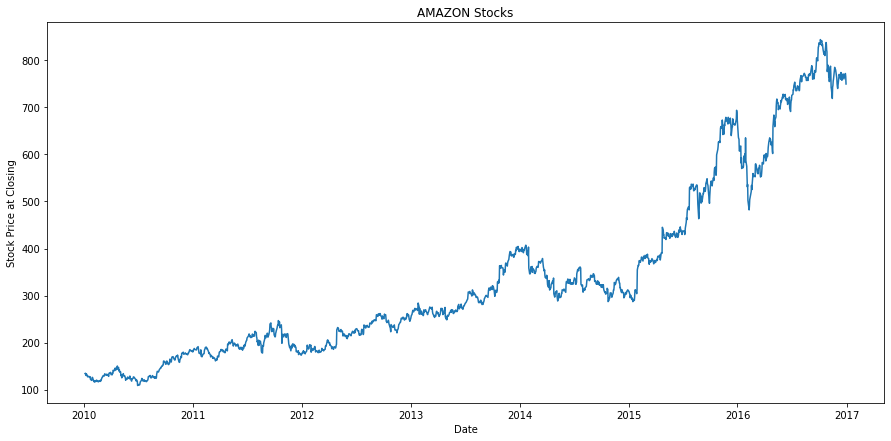

In [206]:
# Plotting the closing price vs. date
plt.figure(figsize=(15, 7))
plt.plot(amzn_df.close)
plt.ylabel('Stock Price at Closing')
plt.xlabel('Date')
plt.title('AMAZON Stocks')

In [207]:
# Function to calculate number of days
first_day = amzn_df.index.min() 
def calculate_days_since(date,reference=first_day): return (date-reference).days  

In [208]:
# Taking x1 as number of days
x1=list(map(calculate_days_since,amzn_df.index))
x1[:10]

[0, 1, 2, 3, 4, 7, 8, 9, 10, 11]

In [209]:
# Taking x2 as volume
x2=list(amzn_df.volume/1000000)
x2[:10]

[7.5999,
 8.8519,
 7.1788,
 11.0302,
 9.8305,
 8.7794,
 9.0963,
 10.7232,
 9.7749,
 15.3765]

In [210]:
# Taking y as closing price
y=list(amzn_df.close)
y[:10]

[133.899994,
 134.690002,
 132.25,
 130.0,
 133.520004,
 130.309998,
 127.349998,
 129.110001,
 127.349998,
 127.139999]

In [211]:
# Checking if number of data rows match
assert len(x1)==len(y)
assert len(x2)==len(y)

In [212]:
# Initalizing parameters w1, w2, b
params=torch.randn(3).requires_grad_() 
w1,w2,b=params
w1,w2,b

loss_param_df=pd.DataFrame(columns = ['w1','w2','b','loss'])

In [213]:
# Defining the model to predict values
def model(x1,x2,params=params): 
    w1, w2, b= params
    return w1*x1 + w2*x2 +b 

In [214]:
# Converting x1, x2 and y to tensors
x1_tensor,x2_tensor,y_tensor = torch.tensor(x1).float() , torch.tensor(x2).float(), torch.tensor(y).float() 
x1_tensor.shape, x2_tensor.shape, y_tensor.shape

(torch.Size([1762]), torch.Size([1762]), torch.Size([1762]))

In [215]:
# Finding the initial predicted values
preds=model(x1_tensor, x2_tensor)
preds.shape

torch.Size([1762])

In [216]:
# Finding the MSE loss
loss_fn=torch.nn.MSELoss()  

def loss_LinearRegression(pred,target):
    assert len(pred)==len(target) 
    return loss_fn(pred,target)

In [217]:
# Steps for one iteration
params = torch.zeros(3).requires_grad_() 
def train_one_iteration(loss_param_df,params,lr=1e-4): 
  preds = model(x1_tensor, x2_tensor, params)
  loss = loss_LinearRegression(preds, y_tensor)
  loss_param_df = loss_param_df.append({'w1':params[0].item(), 'w2':params[1].item(), 'b':params[2].item(), 'loss':loss.item()}, ignore_index = True) 
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None 
  return loss_param_df

MSE Loss: 149917.828125


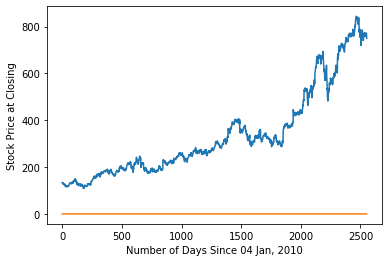

In [218]:
# Plotting the predicted and actual values
def plot_linreg_model(params):
    plt.plot(x1_tensor,y_tensor)
    pred=model(x1_tensor,x2_tensor,params).detach()
    plt.plot(x1_tensor,pred)
    plt.ylabel('Stock Price at Closing')
    plt.xlabel('Number of Days Since '+ str(first_day.strftime("%d %b, %Y")))
    print('MSE Loss:',loss_LinearRegression(pred,y_tensor).item())

plot_linreg_model(params)

In [219]:
# Running for 1000 epochs
for _ in range(1000): loss_param_df=train_one_iteration(loss_param_df,params,lr=2e-7)

In [220]:
# Adding the last set of parameters and loss to the dataframe
preds = model(x1_tensor, x2_tensor, params)
loss = loss_LinearRegression(preds, y_tensor)
loss_param_df = loss_param_df.append({'w1':params[0].item(), 'w2':params[1].item(), 'b':params[2].item(), 'loss':loss.item()}, ignore_index = True)

Amazon Stocks
MSE Loss: 6623.76171875


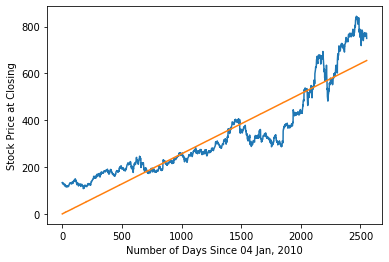

In [221]:
print("Amazon Stocks") 
plot_linreg_model(params)

In [223]:
print("Amazon Stocks") 
loss_param_df

Amazon Stocks


,w1,w2,b,loss
0,0.000000,0.000000,0.000000,149917.828125
1,0.223206,0.000567,0.000135,9081.019531
2,0.252387,0.000677,0.000156,6673.979004
3,0.256201,0.000727,0.000163,6632.832520
4,0.256700,0.000769,0.000167,6632.121094
...,...,...,...,...
996,0.256677,0.041179,0.004229,6623.796875
997,0.256677,0.041219,0.004233,6623.788086
998,0.256677,0.041260,0.004237,6623.779785
999,0.256677,0.041301,0.004241,6623.771484


# NASDAQ

In [224]:
import torch
import matplotlib.pyplot as plt
from datetime import datetime

In [225]:
# Taking only NASDAQ data
ndaq_df = dataframe[dataframe['symbol']=='NDAQ'].set_index('date')
ndaq_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,NDAQ,19.920000,20.240000,19.900000,20.430000,2171500.0
2010-01-05,NDAQ,19.930000,20.299999,19.930000,20.320000,1481700.0
2010-01-06,NDAQ,20.200001,20.290001,20.160000,20.360001,2446700.0
2010-01-07,NDAQ,20.250000,20.020000,19.889999,20.299999,2832800.0
2010-01-08,NDAQ,20.030001,20.230000,19.879999,20.299999,1449200.0


Text(0.5, 1.0, 'NASDAQ Stocks')

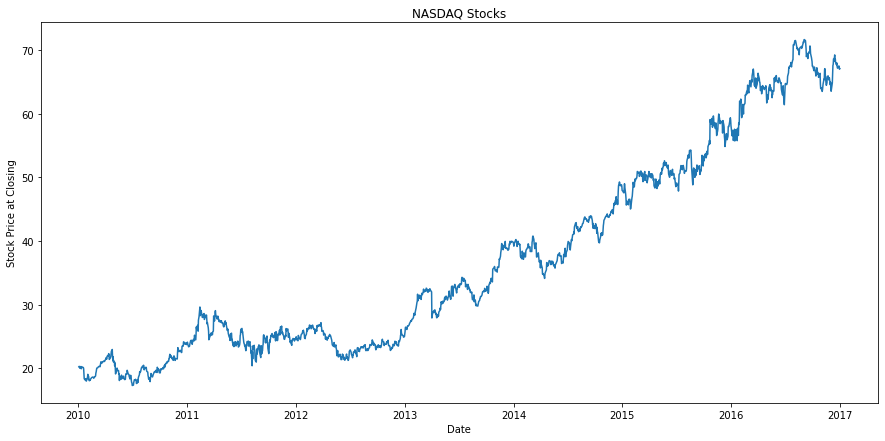

In [226]:
# Plotting the closing price vs. date
plt.figure(figsize=(15, 7))
plt.plot(ndaq_df.close)
plt.ylabel('Stock Price at Closing')
plt.xlabel('Date')
plt.title('NASDAQ Stocks')

In [227]:
# Function to calculate number of days
first_day = ndaq_df.index.min() 
def calculate_days_since(date,reference=first_day): return (date-reference).days 

In [228]:
# Taking x1 as number of days
x1=list(map(calculate_days_since,ndaq_df.index))
x1[:10]

[0, 1, 2, 3, 4, 7, 8, 9, 10, 11]

In [229]:
# Taking x2 as volume
x2=list(ndaq_df.volume/1000000)
x2[:10]

[2.1715,
 1.4817,
 2.4467,
 2.8328,
 1.4492,
 1.7881,
 1.7328,
 2.2773,
 1.4979,
 2.3273]

In [230]:
# Taking y as closing price
y=list(ndaq_df.close)
y[:10]

[20.24,
 20.299999,
 20.290001,
 20.02,
 20.23,
 20.280001000000002,
 19.93,
 20.120001000000002,
 20.25,
 20.16]

In [231]:
# Checking if number of data rows match
assert len(x1)==len(y)
assert len(x2)==len(y)

In [232]:
# Initalizing parameters w1, w2, b
params=torch.randn(3).requires_grad_() 
w1,w2,b=params
w1,w2,b

loss_param_df=pd.DataFrame(columns = ['w1','w2','b','loss'])

In [233]:
# Defining the model to predict values
def model(x1,x2,params=params): 
    w1, w2, b= params
    return w1*x1 + w2*x2 +b 

In [234]:
# Converting x1, x2 and y to tensors
x1_tensor,x2_tensor,y_tensor = torch.tensor(x1).float() , torch.tensor(x2).float(), torch.tensor(y).float() 
x1_tensor.shape, x2_tensor.shape, y_tensor.shape

(torch.Size([1762]), torch.Size([1762]), torch.Size([1762]))

In [235]:
# Finding the initial predicted values
preds=model(x1_tensor, x2_tensor)
preds.shape

torch.Size([1762])

In [236]:
# Finding the MSE loss
loss_fn=torch.nn.MSELoss()  

def loss_LinearRegression(pred,target):
    assert len(pred)==len(target) 
    return loss_fn(pred,target)

In [237]:
# Steps for one iteration
params = torch.zeros(3).requires_grad_() 
def train_one_iteration(loss_param_df,params,lr=1e-4): 
  preds = model(x1_tensor, x2_tensor, params)
  loss = loss_LinearRegression(preds, y_tensor)
  loss_param_df = loss_param_df.append({'w1':params[0].item(), 'w2':params[1].item(), 'b':params[2].item(), 'loss':loss.item()}, ignore_index = True) 
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None 
  return loss_param_df

MSE Loss: 1618.765869140625


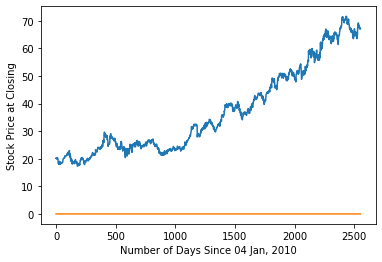

In [238]:
# Plotting the predicted and actual values
def plot_linreg_model(params):
    plt.plot(x1_tensor,y_tensor)
    pred=model(x1_tensor,x2_tensor,params).detach()
    plt.plot(x1_tensor,pred)
    plt.ylabel('Stock Price at Closing')
    plt.xlabel('Number of Days Since '+ str(first_day.strftime("%d %b, %Y")))
    print('MSE Loss:',loss_LinearRegression(pred,y_tensor).item())

plot_linreg_model(params)

In [239]:
# Running for 1000 epochs
for _ in range(1000): loss_param_df=train_one_iteration(loss_param_df,params,lr=2e-7)

In [240]:
# Adding the last set of parameters and loss to the dataframe
preds = model(x1_tensor, x2_tensor, params)
loss = loss_LinearRegression(preds, y_tensor)
loss_param_df = loss_param_df.append({'w1':params[0].item(), 'w2':params[1].item(), 'b':params[2].item(), 'loss':loss.item()}, ignore_index = True)

NASDAQ Stocks
MSE Loss: 59.845062255859375


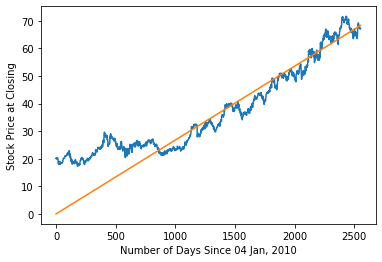

In [241]:
print("NASDAQ Stocks") 
plot_linreg_model(params)

In [242]:
print("NASDAQ Stocks") 
loss_param_df

NASDAQ Stocks


,w1,w2,b,loss
0,0.000000,0.000000,0.000000,1618.765869
1,0.023281,0.000021,0.000015,86.556076
2,0.026325,0.000027,0.000018,60.367413
3,0.026723,0.000031,0.000019,59.919724
4,0.026775,0.000034,0.000020,59.912010
...,...,...,...,...
996,0.026780,0.003482,0.001168,59.845329
997,0.026780,0.003486,0.001169,59.845257
998,0.026780,0.003489,0.001170,59.845196
999,0.026780,0.003493,0.001171,59.845123


# Problem 2: Non Linear Regression
We saw Linear Regression, which aimed at fitting a straight line into the dataset. But what if we wish to fit a non-linear curve into the data. This can be done by replacing a linear function with a polynomial function. 

Instead of:
```
y= w.x + b
```
We could use a non-linear function:
```
y=w1.(x**3) + w2.(x**2) + w3.(x) + b
```

So now, we have a cubic function, instead of a linear function. This can be used to fit a non-linear curve. Generally speaking this is more flexible than a linear curve. It can act as a cubic function, a quadratic function (if you set w1 as 0), a linear function (if w1 and w2 both are 0), or something in between these curves. The method of regression remains the same. Can you implement Non Linear Regression using the cubic function as the model?

Additional tips:
Cubing a value exponentially increases it in magnitude. Computer CPUs cannot handle very large values. This is known as Model Explosion. So we first divide each input by 100, and then apply this model. 

Within your model function: 
Do the following transformation on the input `x`

`input=torch.div(x.detach(),100)`

Then use the input variable as the model input. 

`w1*(input**3) + w2*(input**2) + w3*(input) +b` .

---

Use 20 iterations, and a learning rate of 2e-8.

Does this model perform better than the previous linear regression model? 

Additionally, try different Learning Rates to see if you can improve the results.
Show 5 different reasonable learning rates, and show the plots.

In [272]:
import torch
import matplotlib.pyplot as plt
from datetime import datetime

In [273]:
# Taking only the required data
dataset_df = dataframe[dataframe['symbol']=='NDAQ'].set_index('date')
dataset_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,NDAQ,19.920000,20.240000,19.900000,20.430000,2171500.0
2010-01-05,NDAQ,19.930000,20.299999,19.930000,20.320000,1481700.0
2010-01-06,NDAQ,20.200001,20.290001,20.160000,20.360001,2446700.0
2010-01-07,NDAQ,20.250000,20.020000,19.889999,20.299999,2832800.0
2010-01-08,NDAQ,20.030001,20.230000,19.879999,20.299999,1449200.0


Text(0.5, 0, 'Date')

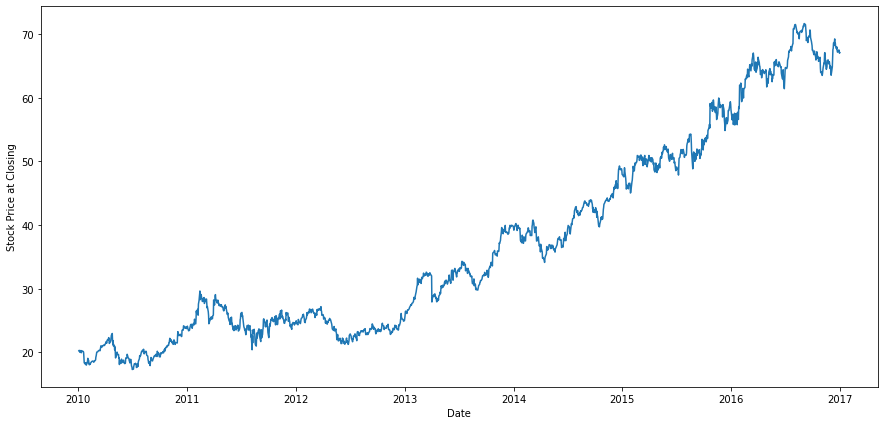

In [274]:
# Plotting the closing price vs. date
plt.figure(figsize=(15, 7))
plt.plot(dataset_df.close)
plt.ylabel('Stock Price at Closing')
plt.xlabel('Date')

In [275]:
# Function to calculate number of days
first_day = dataset_df.index.min() 
def calculate_days_since(date,reference=first_day): return (date-reference).days 

In [276]:
# Taking x as number of days
x=list(map(calculate_days_since,dataset_df.index))
x[:10]

[0, 1, 2, 3, 4, 7, 8, 9, 10, 11]

In [277]:
# Taking y as closing price
y=list(dataset_df.close)
y[:10]

[20.24,
 20.299999,
 20.290001,
 20.02,
 20.23,
 20.280001000000002,
 19.93,
 20.120001000000002,
 20.25,
 20.16]

In [278]:
# Checking if number of data rows match
assert len(x)==len(y)

In [279]:
# Initalizing parameters w1, w2, w3, b
params=torch.randn(4).requires_grad_() 
w1,w2,w3,b=params
w1,w2,w3,b

(tensor(-0.7660, grad_fn=<UnbindBackward>),
 tensor(0.4411, grad_fn=<UnbindBackward>),
 tensor(-0.7197, grad_fn=<UnbindBackward>),
 tensor(-0.4004, grad_fn=<UnbindBackward>))

In [280]:
# Defining the model to predict values
def model(x,params=params): 
    w1,w2,w3,b= params
    return w1*(x**3) + w2*(x**2) + w3*(x) + b 

In [281]:
# Converting x and y to tensors
x_tensor,y_tensor = torch.tensor(x).float() , torch.tensor(y).float()
x_tensor.shape, y_tensor.shape
x_tensor=torch.div(x_tensor.detach(),100)

In [282]:
# Finding the initial predicted values
preds=model(x_tensor)
preds.shape

torch.Size([1762])

In [283]:
# Finding the MSE loss
loss_fn=torch.nn.MSELoss() 

def loss_LinearRegression(pred,target):
    assert len(pred)==len(target)
    return loss_fn(pred,target)

In [284]:
# Steps for one iteration
params = torch.zeros(4).requires_grad_() 
def train_one_iteration(params,lr=1e-4): 
  preds = model(x_tensor, params)
  loss = loss_LinearRegression(preds, y_tensor)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None 

MSE Loss: 1618.765869140625


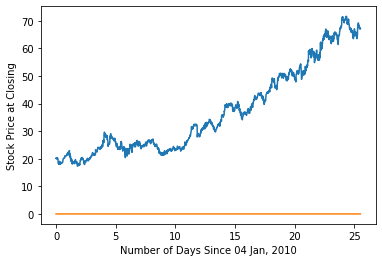

In [285]:
# Plotting the predicted and actual values
def plot_linreg_model(params):
    plt.plot(x_tensor,y_tensor)
    pred=model(x_tensor,params).detach()
    plt.plot(x_tensor,pred)
    plt.ylabel('Stock Price at Closing')
    plt.xlabel('Number of Days Since '+ str(first_day.strftime("%d %b, %Y")))
    print('MSE Loss:',loss_LinearRegression(pred,y_tensor).item())

plot_linreg_model(params)

Learning Rate: 2e-08
MSE Loss: 322.6892395019531


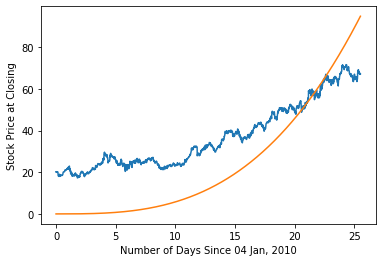

In [286]:
# Running for 20 epochs, lr=2e-8
params = torch.zeros(4).requires_grad_() 
for _ in range(20): loss_param_df=train_one_iteration(params,lr=2e-8)
preds = model(x_tensor, params)
loss = loss_LinearRegression(preds, y_tensor)
print("Learning Rate: "+ str(2e-8))
plot_linreg_model(params)

MSE Loss(Linear Regression)< MSE Loss(Non-Linear Regression) for NASDAQ. The first method (Linear Regression) performs better than non linear regression with 20 iterations, and a learning rate of 2e-8 in the case of NASDAQ.
But generally non-linear regression performs better since it is more flexible.

Learning Rate: 2e-09
MSE Loss: 324.6877746582031


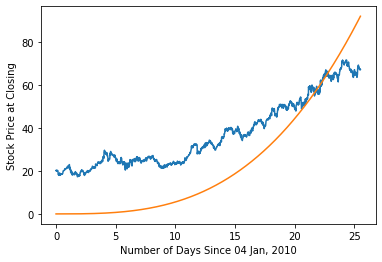

In [287]:
# Running for 20 epochs, lr=2e-9
params = torch.zeros(4).requires_grad_() 
for _ in range(20): loss_param_df=train_one_iteration(params,lr=2e-9)
preds = model(x_tensor, params)
loss = loss_LinearRegression(preds, y_tensor)
print("Learning Rate: "+ str(2e-9))
plot_linreg_model(params)

Learning Rate: 2e-10
MSE Loss: 1005.8890380859375


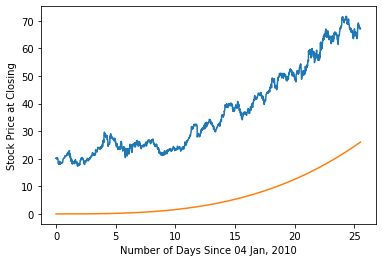

In [288]:
# Running for 20 epochs, lr=2e-10
params = torch.zeros(4).requires_grad_() 
for _ in range(20): loss_param_df=train_one_iteration(params,lr=2e-10)
preds = model(x_tensor, params)
loss = loss_LinearRegression(preds, y_tensor)
print("Learning Rate: "+ str(2e-10))
plot_linreg_model(params)

Learning Rate: 2e-06
MSE Loss: 323.2920227050781


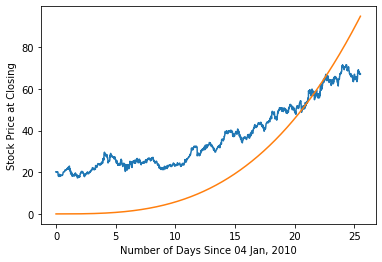

In [289]:
# Running for 20 epochs, lr=5e-9
params = torch.zeros(4).requires_grad_()
for _ in range(20): loss_param_df=train_one_iteration(params,lr=5e-9)
preds = model(x_tensor, params)
loss = loss_LinearRegression(preds, y_tensor)
print("Learning Rate: "+ str(2e-6))
plot_linreg_model(params)

Learning Rate: 8e-10
MSE Loss: 417.0628662109375


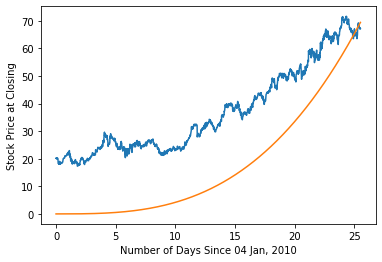

In [290]:
# Running for 20 epochs, lr=8e-10
params = torch.zeros(4).requires_grad_()
for _ in range(20): loss_param_df=train_one_iteration(params,lr=8e-10)
preds = model(x_tensor, params)
loss = loss_LinearRegression(preds, y_tensor)
print("Learning Rate: "+ str(8e-10))
plot_linreg_model(params)

Learning Rate: 8e-09
MSE Loss: 323.17138671875


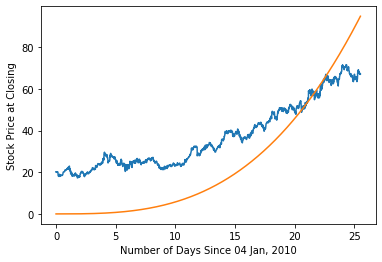

In [291]:
# Running for 20 epochs, lr=8e-9
params = torch.zeros(4).requires_grad_()
for _ in range(20): loss_param_df=train_one_iteration(params,lr=8e-9)
preds = model(x_tensor, params)
loss = loss_LinearRegression(preds, y_tensor)
print("Learning Rate: "+ str(8e-9))
plot_linreg_model(params)